In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data=pd.read_csv("kc_house_data.csv")
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =(  30 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


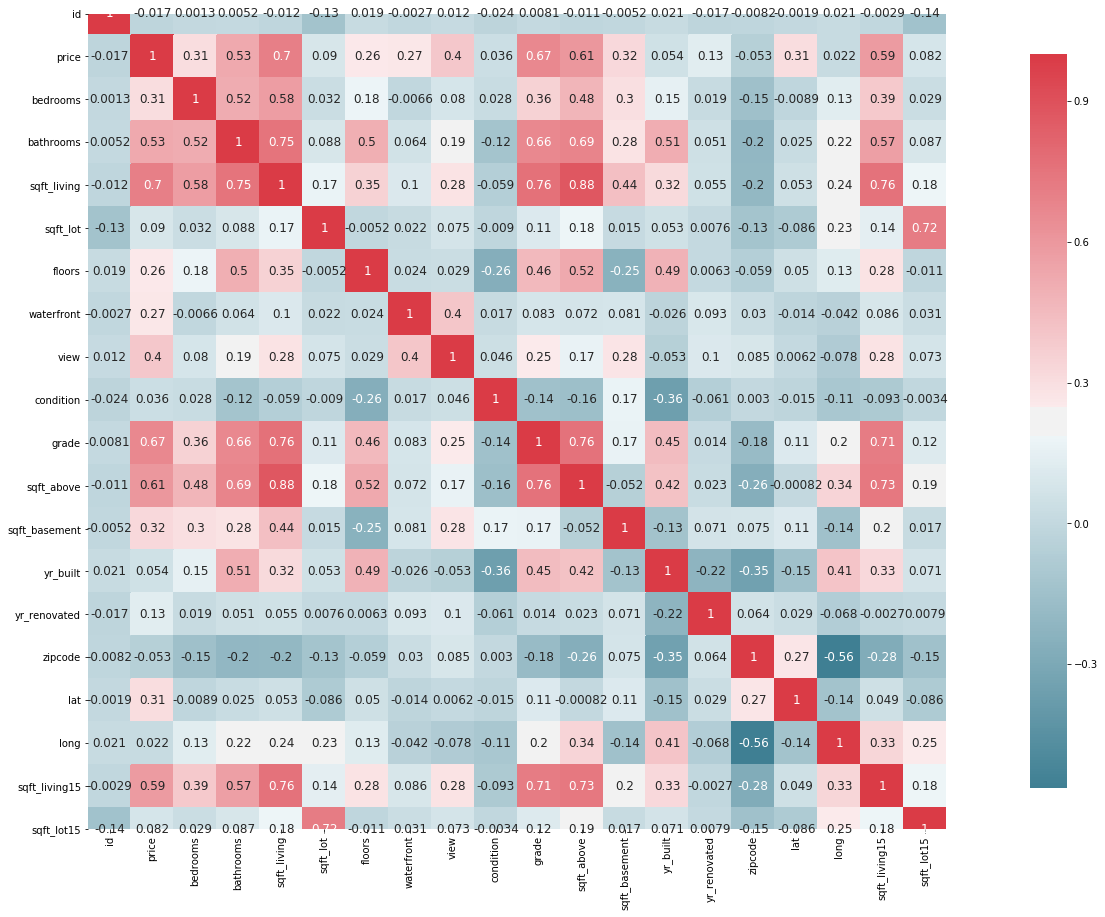

In [7]:
plot_correlation_map( data )

In [10]:
y=data[["price"]]
X=data[["sqft_living"]]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20,random_state=30)
y_test

,price
20999,353500.0
20641,384950.0
7065,340000.0
21068,400950.0
6715,602000.0
...,...
6341,490000.0
13768,372000.0
2210,760000.0
17689,605000.0


In [37]:
X=data[['bathrooms']]
y=data[['price']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))


MSE : 89550909069.11137
R squared : 0.28768160961270095


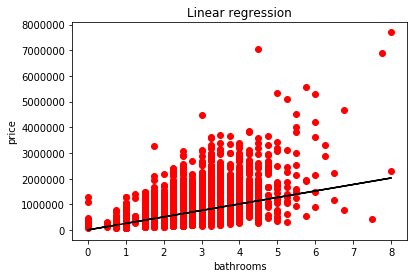

In [38]:
plt.scatter(X,y,color='r')
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(X,model.predict(X),color='k')
plt.show()


In [31]:
X=data[['sqft_living']]
y=data[['price']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))


MSE : 62902408306.865036
R squared : 0.4996528488387416


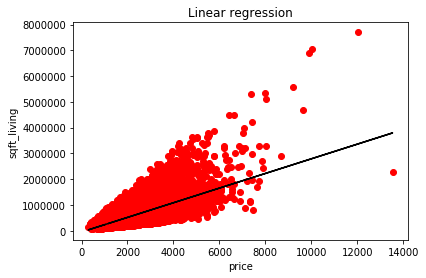

In [32]:
plt.scatter(X,y,color='r')
plt.title("Linear regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(X,model.predict(X),color='k')
plt.show()


In [27]:
X=data[['price']]
y=data[['grade']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))


MSE : 0.7570802302199184
R squared : 0.45542375066219487


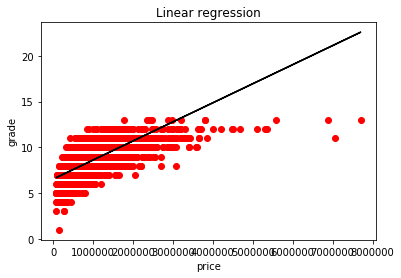

In [30]:
plt.scatter(X,y,color='r')
plt.title("Linear regression")
plt.ylabel("grade")
plt.xlabel("price")
plt.plot(X,model.predict(X),color='k')
plt.show()


In [39]:
X=data[['price','sqft_living','bathrooms']]
y=data[['grade']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))


MSE : 0.4992092789963743
R squared : 0.64091320055801


In [5]:
X=[[0.67,0.88],[0.76,0.7]]
y=[109.85,155.72]

model=LinearRegression()
poly=PolynomialFeatures(degree=2)